# Fit Using Inequality Constraint

This example shows how to use `lmfit_global.LmfitGlobal` class to fit data with inequality constraints by making use of `lmfit Parameter`(s) `expr`. 

This example is similar to `example_fit_with_inequality.py` of [lmfit examples](https://lmfit.github.io/lmfit-py/examples/index.html) or [github link](https://github.com/lmfit/lmfit-py/tree/master/examples)


In [1]:
try:
    from lmfit_global import LmfitGlobal
    from lmfit_global.util.utils import GlobalFitBuilder
except (ImportError, ModuleNotFoundError):
    import os, sys
    ROOT = os.path.abspath("..")  # parent of examples
    sys.path.insert(0, ROOT)

    from lmfit_global import LmfitGlobal
    from lmfit_global.util.utils import GlobalFitBuilder

import matplotlib
import matplotlib.pyplot as plt

# Define `LmfitGlobal` class `items` data

First, create raw data... (always in nd.array with shape N, ny)

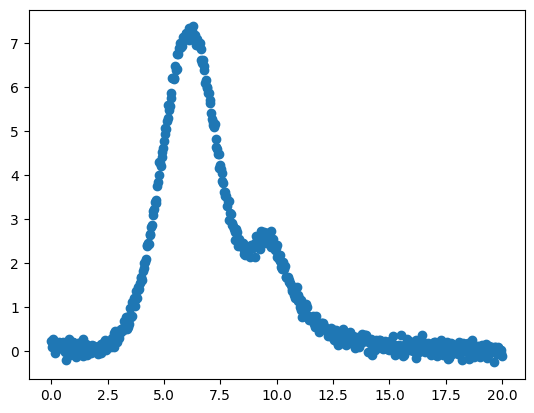

In [2]:
import numpy as np
log2 = np.log(2)
s2pi = np.sqrt(2*np.pi)
s2 = np.sqrt(2.0)
# tiny had been numpy.finfo(numpy.float64).eps ~=2.2e16.
# here, we explicitly set it to 1.e-15 == numpy.finfo(numpy.float64).resolution
tiny = 1.0e-15

def not_zero(value):
    """Return value with a minimal absolute size of tiny, preserving the sign.

    This is a helper function to prevent ZeroDivisionError's.

    Args::
        value (float): Value to be ensured not to be zero.

    Returns:
        float: Value ensured not to be zero.

    """
    return float(np.copysign(max(tiny, abs(value)), value))

def gaussian(x, amplitude=1.0, center=0.0, sigma=1.0):
    """Return a 1-dimensional Gaussian function.

    gaussian(x, amplitude, center, sigma) =
        (amplitude/(s2pi*sigma)) * exp(-(1.0*x-center)**2 / (2*sigma**2))

    """
    return ((amplitude/(max(tiny, s2pi*sigma)))
            * np.exp(-(1.0*x-center)**2 / max(tiny, (2*sigma**2))))

def lorentzian(x, amplitude=1.0, center=0.0, sigma=1.0):
    """Return a 1-dimensional Lorentzian function.

    lorentzian(x, amplitude, center, sigma) =
        (amplitude/(1 + ((1.0*x-center)/sigma)**2)) / (pi*sigma)

    """
    return ((amplitude/(1 + ((1.0*x-center)/max(tiny, sigma))**2))
            / max(tiny, (np.pi*sigma)))


np.random.seed(0)
x = np.linspace(0, 20.0, 601)

data = (
    gaussian(x, 21, 6.1, 1.2) + lorentzian(x, 10, 9.6, 1.3) +
    np.random.normal(scale=0.1, size=x.size)
        )

xy = np.column_stack([x, data])

plt.plot(x, data, 'o')
plt.show()

finally, built `data` and `function` **`items`** `dict` for `LmfitGlobal` ...

In [3]:
init_gauss = {
    'amplitude': {'value':20.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
    'center': {'value':5, },
    'sigma': {'value':1, },
}

init_loren = {
        'amplitude': {'value':8.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
        'center': {'value':8, },
        'sigma': {'value':1, },
}

In [4]:
# data dict
data_dict = {
    'xy': xy,         # data_xy, i.e numpy.column_stack([x, y_0, y_1, ..., y_n])
    'xrange': None    # x range in (min, max) of the data range to fit, default is None
    }

func_lst = [
    {
        'func_name': gaussian,
        'init_params' : init_gauss,
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
    {
        'func_name': lorentzian,
        'init_params' : init_loren,
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
]

# function dict
function_dict = {
    'theory': func_lst,
    'theory_connectors': ['+'],
}


# items 
items = {
    'data': data_dict,              # 1. data (see above)
    'functions': function_dict,     # 2. thoery (see above)
}

In [5]:
builder = (
    GlobalFitBuilder()
    .set_data(x, data)                      # x and all y datasets
    .add_model(gaussian,   init_gauss, func_kws={})
    .add_model(lorentzian, init_loren, func_kws={})       
    .connect("+")                             # how to combine the 2 functions
)

items = builder.build()

fit with iter callback...

In [6]:
def per_iteration(pars, iteration, resid, *args, **kws):
    print(" ITER ", iteration, [f"{p.name} = {p.value:.5f}" for p in pars.values()])

call `LmfitGlobal` class ...

In [7]:
lg = LmfitGlobal(items)
lg.fit(iter_cb=per_iteration)

INFO: Parsing inputs...
INFO: Parsing input data...
INFO: Detected 1 dataset(s) with N=601 points each...
INFO: XRANGE: N=601 points each for user supplied xrange [0.0, 20.0] ...
INFO: Parsing input data COMPLETED...
INFO: Parsing function models...
INFO: 2 model component(s) detected — multi-component fit...
INFO: The model connectors used: [+]
INFO: Parsing function models COMPLETED...
INFO: The model is to be constructed as...
INFO: ############################################################################
INFO: # y(x;) = gaussian(x, amplitude, center, sigma) + lorentzian(x, amplitude, #
INFO: # center, sigma)                                                           #
INFO: ############################################################################
INFO: Building lmfit backend...
INFO: Creating lmfit.Models for the models(s) function(s)...
INFO: Building lmfit CompositeModel...
INFO: CompositeModel built successfully...
INFO: Initialized parameters...
INFO: Fitting started (meth

 ITER  -1 ['c0_amplitude_0 = 20.00000', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00000', 'c1_amplitude_0 = 8.00000', 'c1_center_0 = 8.00000', 'c1_sigma_0 = 1.00000']
 ITER  0 ['c0_amplitude_0 = 20.00000', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00000', 'c1_amplitude_0 = 8.00000', 'c1_center_0 = 8.00000', 'c1_sigma_0 = 1.00000']
 ITER  1 ['c0_amplitude_0 = 20.00000', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00000', 'c1_amplitude_0 = 8.00000', 'c1_center_0 = 8.00000', 'c1_sigma_0 = 1.00000']
 ITER  2 ['c0_amplitude_0 = 20.00020', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00000', 'c1_amplitude_0 = 8.00000', 'c1_center_0 = 8.00000', 'c1_sigma_0 = 1.00000']
 ITER  3 ['c0_amplitude_0 = 20.00000', 'c0_center_0 = 5.00005', 'c0_sigma_0 = 1.00000', 'c1_amplitude_0 = 8.00000', 'c1_center_0 = 8.00000', 'c1_sigma_0 = 1.00000']
 ITER  4 ['c0_amplitude_0 = 20.00000', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00001', 'c1_amplitude_0 = 8.00000', 'c1_center_0 = 8.00000', 'c1_sigma_0 = 1.00000']
 ITER  5 

[[Model]]
    (Model(gaussian, prefix='c0_') + Model(lorentzian, prefix='c1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 59
    # data points      = 601
    # variables        = 6
    chi-square         = 5.95307350
    reduced chi-square = 0.01000517
    Akaike info crit   = -2761.42706
    Bayesian info crit = -2735.03549
    R-squared          = 0.99772960
[[Variables]]
    c0_amplitude_0:  21.1752976 +/- 0.07534174 (0.36%) (init = 20)
    c0_center_0:     6.10195712 +/- 0.00376180 (0.06%) (init = 5)
    c0_sigma_0:      1.20982321 +/- 0.00415189 (0.34%) (init = 1)
    c1_amplitude_0:  9.63958198 +/- 0.11269852 (1.17%) (init = 8)
    c1_center_0:     9.61639910 +/- 0.01249022 (0.13%) (init = 8)
    c1_sigma_0:      1.24499366 +/- 0.01753847 (1.41%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1_amplitude_0, c1_sigma_0)     = +0.8397
    C(c0_amplitude_0, c0_sigma_0)     = +0.7842
    C(c0_amplitude_0, c1_amplitude_0) = 

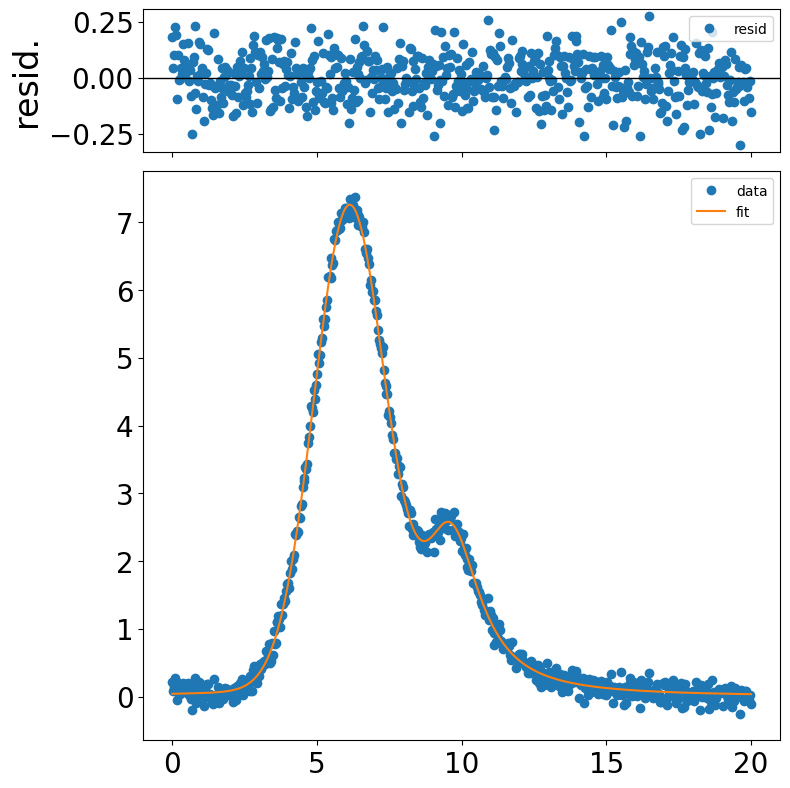

In [8]:
lg.report()
lg.plot()

#### Applying an Inequality Constraint

In this step, we extend the global fitting model by introducing a new parameter and enforcing a physically motivated constraint between two peak-center parameters.

---

##### **1. Adding the Peak-Splitting Parameter `alpha`**

We introduce a new global fitting parameter called **`alpha`**, representing the peak splitting between two components.  
This parameter is defined with the following properties:

- It is **global**, i.e., not dataset‑dependent.
- It is allowed to vary between **`'min' = 0`** and **`'max' = 5`**.
- It is intentionally named **`alpha`** (without the underscore `_0` suffix .i.e. **`alpha_0`**) to ensure that it is *not* interpreted as a dataset‑indexed parameter by the `LmfitGlobal()`.

We can add non existing parameter as:
```python
LmfitGlobal.add_par(
        self,
        *parlist: Iterable
    )
```

where  `parlist` is of type: 
```python
*parlist: Union[str, list[str], lmfit.Parameter, lmfit.Parameters, Iterable, Dict]
```

and 
```python
parlist = {
  "alpha": {"value": 2.5,  "min":0, "max": 5, "vary": True}
  }
```

This parameter will later be used to impose a constraint on the second peak center.

---

##### **2. Constraining `c1_center_0` Using an Expression**

After defining `alpha`, we enforce a relationship between the two peak centers: `c1_center_0` $=$ `c0_center_0` $ +\alpha$

This ensures that:

- The second peak center (`c1_center_0`) is always shifted relative to the first (`c0_center_0`).
- The shift is controlled by the global parameter `alpha`.
- The inequality constraint  `c1_center_0` $\ge$ `c0_center_0`
  is automatically satisfied because `alpha ≥ 0`.

To apply this parameter constraint, we use:

```python
LmfitGlobal.set_expr(
        self,
        mapping: dict[str, str | None],
        *,
        overwrite_expr: bool = False
    )
```

where
```python
mapping   = {
                "c1_center_0": "alpha + c0_center_0", 
                "c1_sigma_0": "c0_sigma_0"
            }
```

Note: the case for   `"c1_sigma_0": "c0_sigma_0"` is similar to use to the use of `LmfitGlobal.set_global_params()` in previous examples

In [9]:
lg.rebuild()  # rebuild LmfitGlobal

parlist = {
  "alpha": {"value": 2.5,  "min":0, "max": 5, "vary": True}
  }
lg.add_par(parlist)  # add new non existing parameters from fit functions

# --- set "inequality" contrain below
mapping   = {
                "c1_center_0": "alpha + c0_center_0", 
                "c1_sigma_0": "c0_sigma_0"
            }
lg.set_expr(mapping, overwrite_expr=True)

lg.init_params.pretty_print()  # pretty print initial parameters 

INFO: Rebuilding lmfit backend...
INFO: Building lmfit backend...
INFO: Creating lmfit.Models for the models(s) function(s)...
INFO: Building lmfit CompositeModel...
INFO: CompositeModel built successfully...
INFO: Initialized parameters...
INFO: Added parameter 'alpha' with: {'value': 2.5, 'vary': True, 'min': 0, 'max': 5, 'expr': None, 'brute_step': None} ...
INFO: Set 'expr' for parameter 'c1_center_0' with: expr=None to expr='alpha + c0_center_0' ...
INFO: Set 'expr' for parameter 'c1_sigma_0' with: expr=None to expr='c0_sigma_0' ...


Name               Value      Min      Max   Stderr     Vary     Expr Brute_Step
alpha                2.5        0        5     None     True     None     None
c0_amplitude_0        20     -inf      inf     None     True     None     None
c0_center_0            5     -inf      inf     None     True     None     None
c0_sigma_0             1     -inf      inf     None     True     None     None
c1_amplitude_0         8     -inf      inf     None     True     None     None
c1_center_0          7.5     -inf      inf     None    False alpha + c0_center_0     None
c1_sigma_0             1     -inf      inf     None    False c0_sigma_0     None


In [10]:
lg.fit(verbose=True, iter_cb=per_iteration)  # verbose, if True will show fit parameters

INFO: Fitting started (method='leastsq') ...
INFO: Parameters fit values:
INFO: Name               Value      Min      Max   Stderr     Vary     Expr Brute_Step
INFO: alpha              3.522        0        5  0.01005     True     None     None
INFO: c0_amplitude_0     21.27     -inf      inf  0.05139     True     None     None
INFO: c0_center_0        6.105     -inf      inf 0.003346     True     None     None
INFO: c0_sigma_0         1.214     -inf      inf 0.003273     True     None     None
INFO: c1_amplitude_0     9.465     -inf      inf  0.05445     True     None     None
INFO: c1_center_0        9.627     -inf      inf  0.01066    False alpha + c0_center_0     None
INFO: c1_sigma_0         1.214     -inf      inf 0.003273    False c0_sigma_0     None
INFO: Coefficient of determination (R^2) statistics:
INFO:   R-squared = 0.99771719
INFO: Fitting finished: SUCCESS
INFO: nfev=56 | rsquared=0.99771719 | redchi=0.01004295 | aic=-2760.1524 | bic=-2738.1595 | time=0.02s ...


 ITER  -1 ['c0_amplitude_0 = 20.00000', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00000', 'c1_amplitude_0 = 8.00000', 'c1_center_0 = 7.50000', 'c1_sigma_0 = 1.00000', 'alpha = 2.50000']
 ITER  0 ['c0_amplitude_0 = 20.00000', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00000', 'c1_amplitude_0 = 8.00000', 'c1_center_0 = 7.50000', 'c1_sigma_0 = 1.00000', 'alpha = 2.50000']
 ITER  1 ['c0_amplitude_0 = 20.00000', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00000', 'c1_amplitude_0 = 8.00000', 'c1_center_0 = 7.50000', 'c1_sigma_0 = 1.00000', 'alpha = 2.50000']
 ITER  2 ['c0_amplitude_0 = 20.00020', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1.00000', 'c1_amplitude_0 = 8.00000', 'c1_center_0 = 7.50000', 'c1_sigma_0 = 1.00000', 'alpha = 2.50000']
 ITER  3 ['c0_amplitude_0 = 20.00000', 'c0_center_0 = 5.00005', 'c0_sigma_0 = 1.00000', 'c1_amplitude_0 = 8.00000', 'c1_center_0 = 7.50005', 'c1_sigma_0 = 1.00000', 'alpha = 2.50000']
 ITER  4 ['c0_amplitude_0 = 20.00000', 'c0_center_0 = 5.00000', 'c0_sigma_0 = 1

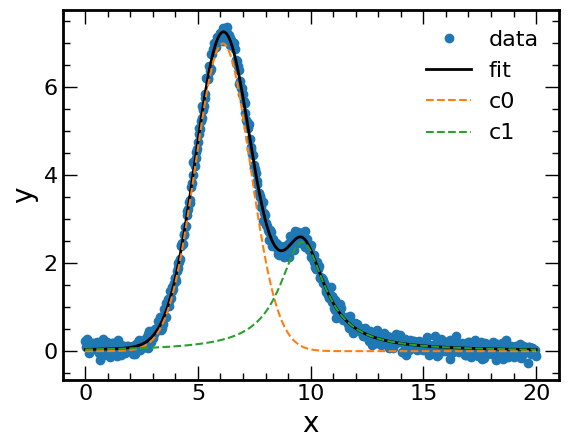

In [11]:
def _data_label(i: int, is_multidataset: bool) -> str | None:
    if is_multidataset:
        return f"data {i+1}"
    return "data" if i == 0 else None

def _fit_label(i: int, is_multidataset: bool, same_fit_color: bool) -> str | None:
    if not is_multidataset:
        return "fit" if i == 0 else None
    if same_fit_color:
        return "fit" if i == 0 else None
    return f"fit {i+1}"


fd = lg.get_fitdata(numpoints=1024) # int or None
fd.x_data
fd.resid_fit

fig, ax = plt.subplots()


for i in range(fd.ny):
    # --- data ---
    ax.plot(
        fd.x_data,
        fd.y_data[:, i],
        'o',
        zorder=1,
        label=_data_label(i, fd.is_multidataset),
    )

    # --- fit ---
    ax.plot(
        fd.x_model,
        fd.y_fit[:, i],
        '-',
        lw=2,
        color='k',
        zorder=2,
        label=_fit_label(i, fd.is_multidataset, same_fit_color=True)
        # label="fit" if i == fd.ny-1 else None, # ONE legend entry only
    )

    # --- components ---
    comps = None
    comps_names = None
    if fd.is_multicomponent:
        comps = fd.components
        comps_names = fd.component_names
        if fd.is_multidataset:
            comp = comps[i]
        else:
            comp = comps
        for name in comps_names:
            d_dict = comp[name]
            ax.plot(fd.x_data,  d_dict['data'],  '--', zorder=3, label=name)
            # ax.plot(fd.x_model, d_dict['model'], '--', label=name)

fontsize=16
ax.minorticks_on()
ax.set_xlabel('x', fontsize=fontsize+4)
ax.set_ylabel('y', fontsize=fontsize+4)
ax.tick_params(axis='x', labelsize=fontsize, labelcolor='k')  # Increase x-axis tick font size
ax.tick_params(axis='y', labelsize=fontsize, labelcolor='k')  # Increase y-axis tick font size
ax.tick_params(direction="in", which="both", top=True, right=True, labelsize=fontsize, labelcolor="k")
ax.tick_params(axis="both", which="major", length=10, width=1.0)
ax.tick_params(axis="both", which="minor", length=5,  width=1.0)
for spine in ax.spines.values():
    spine.set_linewidth(2)

# ax.legend()
ax.legend(
    prop={
        "size": fontsize,
        "family": "sans-serif",
        "weight": "normal",
    },
    frameon=False,
)
plt.show()

# see next examples on how we can handle multi-component and multi-dataset fit